In [2]:
import numpy as np
import matplotlib.pyplot as plt

from natsort import natsorted

from matplotlib import cm
from glob import glob

cmap = cm.get_cmap('viridis')
plt.rcParams.update({'font.size': 14})

/tmp/ipykernel_165211/1263976303.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


In [3]:
dataPaths = glob("../data/trianglePeriods/*")
print(dataPaths)

['../data/trianglePeriods/50ms.csv', '../data/trianglePeriods/100ms.csv']


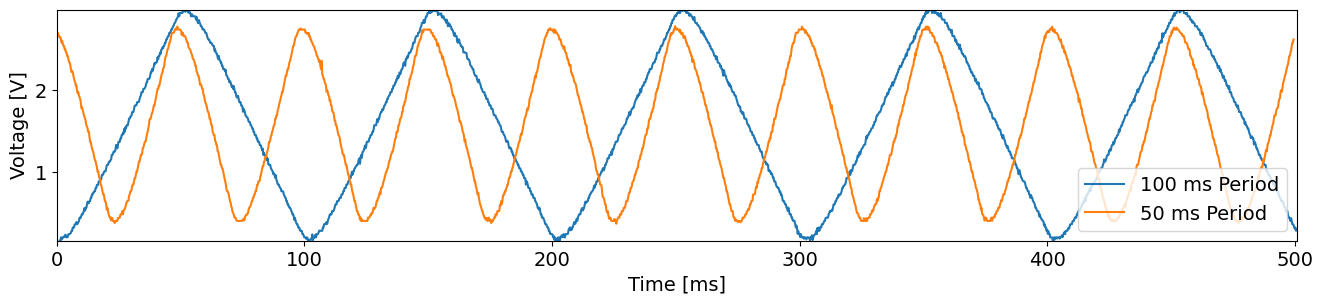

In [4]:
fig, ax = plt.subplots(figsize=(16,3))

labels = ["100 ms Period", "50 ms Period"]

for i, path in enumerate(dataPaths):
    data = np.loadtxt(path, skiprows=2, delimiter=",")

    # Alligning start points
    if i == 0:
        ax.plot(data[:,0]*1000+227, data[:,1], label=labels[i])
    else:
        ax.plot(data[:,0]*1000+238, data[:,1], label=labels[i])


ax.set_xlabel("Time [ms]")
ax.set_ylabel("Voltage [V]")
ax.legend(loc="lower right")
ax.margins(0);

In [5]:
dataPaths = glob("../data/sinFrequencies/*")
dataPaths = natsorted(dataPaths)
print(dataPaths)

['../data/sinFrequencies/sin1Hz.csv', '../data/sinFrequencies/sin5Hz.csv', '../data/sinFrequencies/sin10Hz.csv', '../data/sinFrequencies/sin15Hz.csv', '../data/sinFrequencies/sin20Hz.csv', '../data/sinFrequencies/sin25Hz.csv', '../data/sinFrequencies/sin50Hz.csv', '../data/sinFrequencies/sin75Hz.csv', '../data/sinFrequencies/sin100Hz.csv', '../data/sinFrequencies/sin1000Hz.csv']


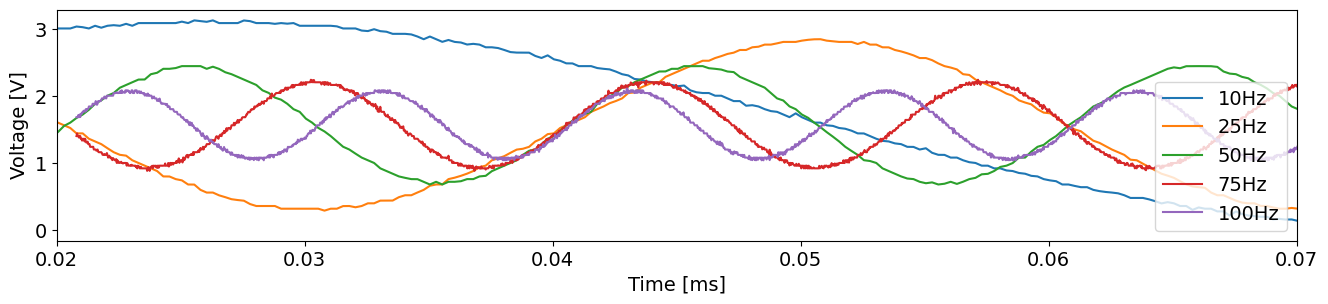

In [6]:
fig, ax = plt.subplots(figsize=(16,3))

# Extracting just the frequency from the file name
labels = [path.split("/")[-1][3:-4] for path in dataPaths]

for i, path in enumerate(dataPaths):

    # Choosing to plot only a select few
    if i in [0, 1, 3, 4, 9]:
        continue

    data = np.loadtxt(path, skiprows=2, delimiter=",")

    ax.plot(data[:,0], data[:,1], label=labels[i])

ax.set_xlim(0.02, 0.07)
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Voltage [V]")
ax.legend(loc="lower right")
ax.margins(x=0);

In [3]:
def DetermineAmplitude(data):
    # Rough guess of the amplitude through subtracting the mean from the max value
    # Could use curve_fit but initial parameters of frequency get difficult

    centreValue = np.mean(data[:,1])

    amplitude = np.max(data) - centreValue

    return amplitude


sinAmplitudes = []

for path in dataPaths:

    data = np.loadtxt(path, skiprows=2, delimiter=",")
    
    sinAmplitudes.append(DetermineAmplitude(data))

def ExponentialCurve(x, a, b, c):
    y = []
    
    for point in x:
        y.append(a * exp(- b * point) + c)
    
    return y

#pars, cov = curve_fit(ExponentialCurve)

frequencies = [int(el[:-2]) for el in labels]
decibles = 10*np.log10(np.array(sinAmplitudes) / 1.65) # Pico IO voltage is fixed at 3.3V

fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(frequencies, decibles, label="Generated Sin Waves")
ax.vlines([15.915], ymin=-12, ymax=1, ls="dashed", color="orange", label="$f_c=15.915$ Hz")

ax.set_xscale("log")
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Amplitude Attenuation [dB]")
ax.legend()
ax.margins(y=0)

NameError: name 'dataPaths' is not defined

In [5]:
data = np.loadtxt("../data/dacVariations/dacVariations_R680_1uF.csv", skiprows=2, delimiter=",")

In [6]:
high = max(data[:,2])
low = min(data[:,2])

print((high - low) / np.mean(data[:,2]))

2.1459382257920043


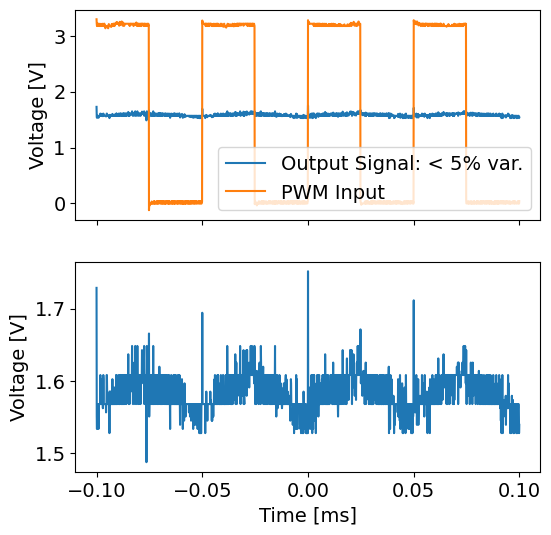

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(6,6), sharex=True)

ax0, ax1 = axes

ax0.plot(data[:,0]*1000, data[:,1], label="Output Signal: < 5% var.")
ax0.plot(data[:,0]*1000, data[:,2], label="PWM Input")

ax0.set_ylabel("Voltage [V]")
ax1.set_ylabel("Voltage [V]")

ax1.plot(data[:,0]*1000, data[:,1])

plt.xlabel("Time [ms]")
ax0.legend(loc="lower right");